## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Camera Calibration

The camera is calibrated using a series of calibration (chessboard) images. The calibration process involves finding each chessboard corner and mapping those 2D image-space locations to the chessboard corners in 3D object space. 

The chessboard is assumed to be fixed onthe (x, y) plain at z=0, such that the object points are the same for each calibration image. The object points, `objp`, are thus initialized with values like (0, 0, 0), (1, 0, 0), (2, 0, 0), ..., (9, 6, 0). For each calibrarion image, the corners found using `cv2.findChessboardCorners()` are added to `imgpoints` while the predefined `objp` array is appened to `ojbpoints`. The resulting `imgpoints` and `objpoints` from the full set of calibration images provides enough pixel-to-object mapping information to construct the camera matrix and distortion coefficients using `cv2.calibrateCamera()`. 

The `Camera` class is defined to encapsulate the calibration and image correction concepts. 

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

class Camera():
    def __init__(self):
        self.camera_matrix = None
        self.dist_coeffs = None
        self.rvecs = None
        self.tvecs = None
    
    def calibrate(self, images, board_x, board_y):
        board_size = (board_x, board_y)
        print("Calibrating camera with board size {}...".format(board_size))

        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        objp = np.zeros((board_x * board_y, 3), np.float32)
        objp[:,:2] = np.mgrid[0:board_x, 0:board_y].T.reshape(-1,2)

        # Arrays to store object points and image points from all the images.
        objpoints = [] # 3d points in real world space
        imgpoints = [] # 2d points in image plane.

        # Step through the list and search for chessboard corners
        for idx, fname in enumerate(images):
            img = cv2.imread(fname)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, board_size, None)

            # If found, add object points, image points
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(corners)

        shape = img.shape[0:2]
        result = cv2.calibrateCamera(objpoints, imgpoints, shape, None, None)
        retval, self.camera_matrix, self.dist_coeffs, self.rvecs, self.tvecs = result
        return retval != 0
    
    def undistort(self, image):
        return cv2.undistort(image, self.camera_matrix, self.dist_coeffs, None, self.camera_matrix)


# Make a list of calibration images
cal_images = glob.glob('camera_cal/cal*.jpg')

camera = Camera()
camera.calibrate(cal_images, 9, 6)

Calibrating camera with board size (9, 6)...


True

## Distortion Correction

Distortion correction is applied to a test image using the `cv2.undistort()` function and obtained this result: 

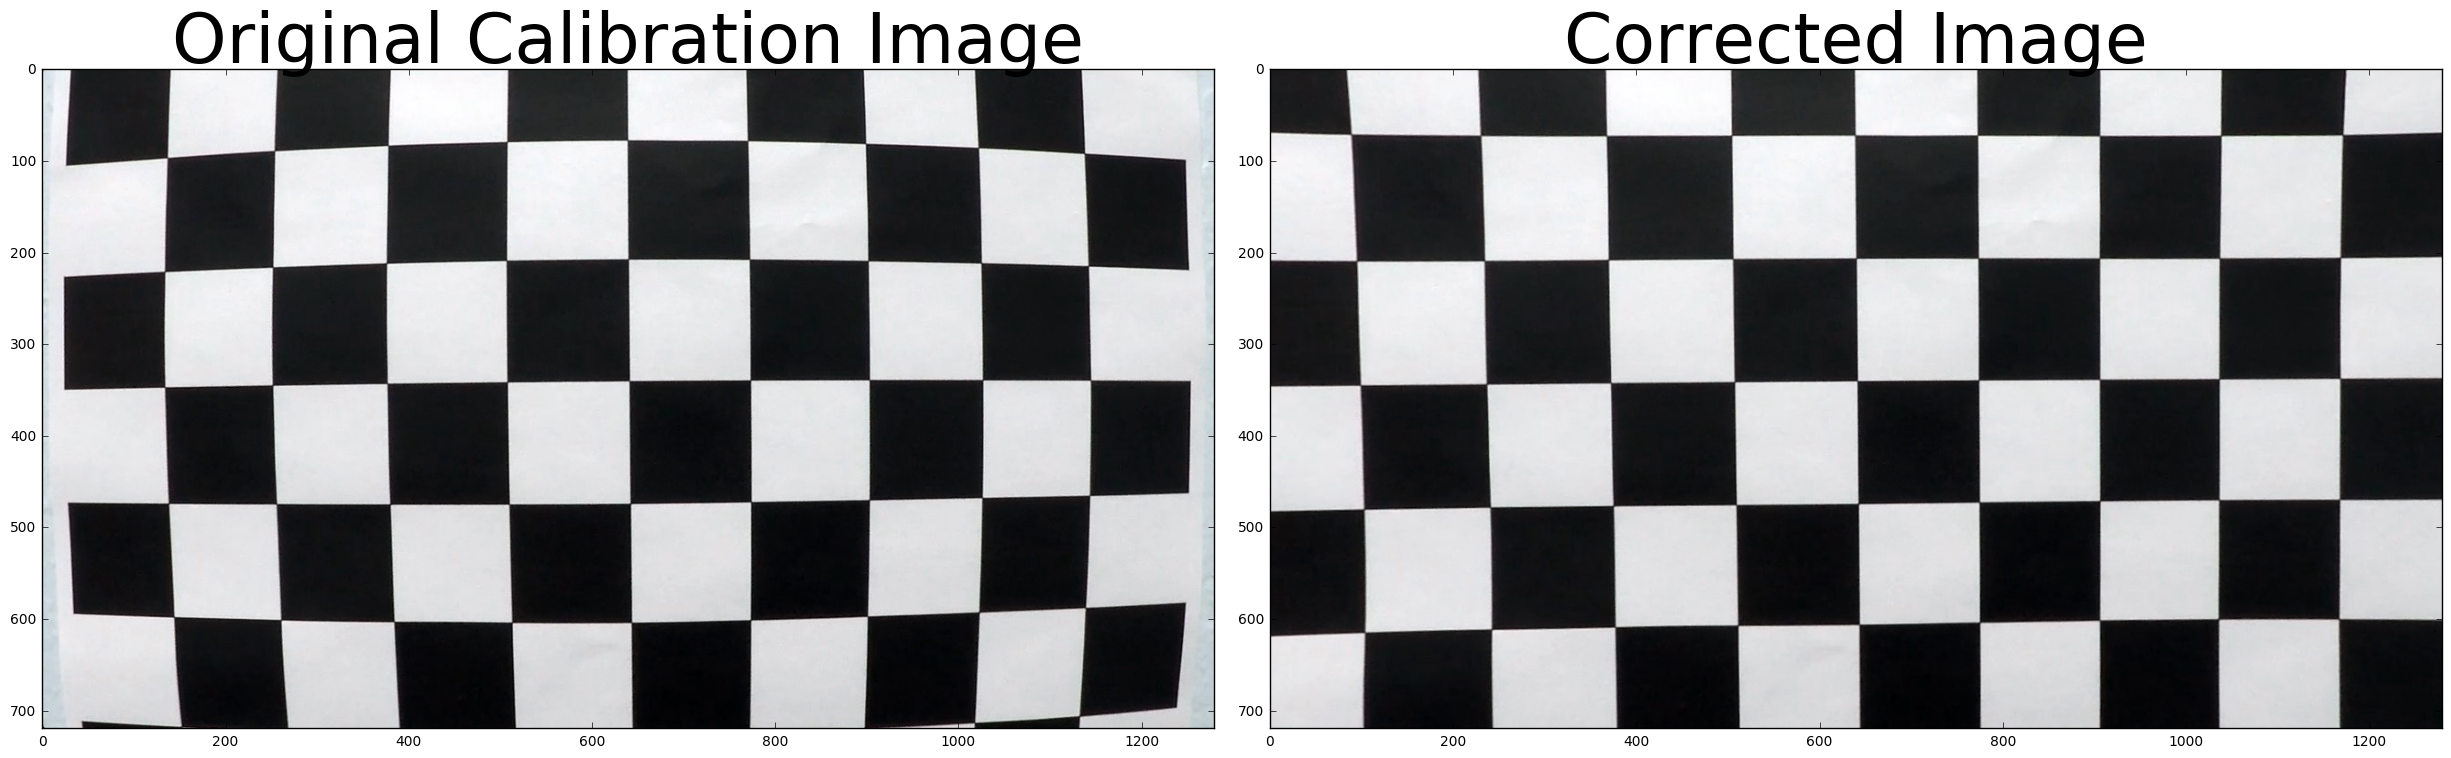

In [2]:
cal_image = cv2.imread(cal_images[0])
corrected = camera.undistort(cal_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cal_image)
ax1.set_title('Original Calibration Image', fontsize=50)
ax2.imshow(corrected)
ax2.set_title('Corrected Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


Distortion correction is now applied to one test image below:

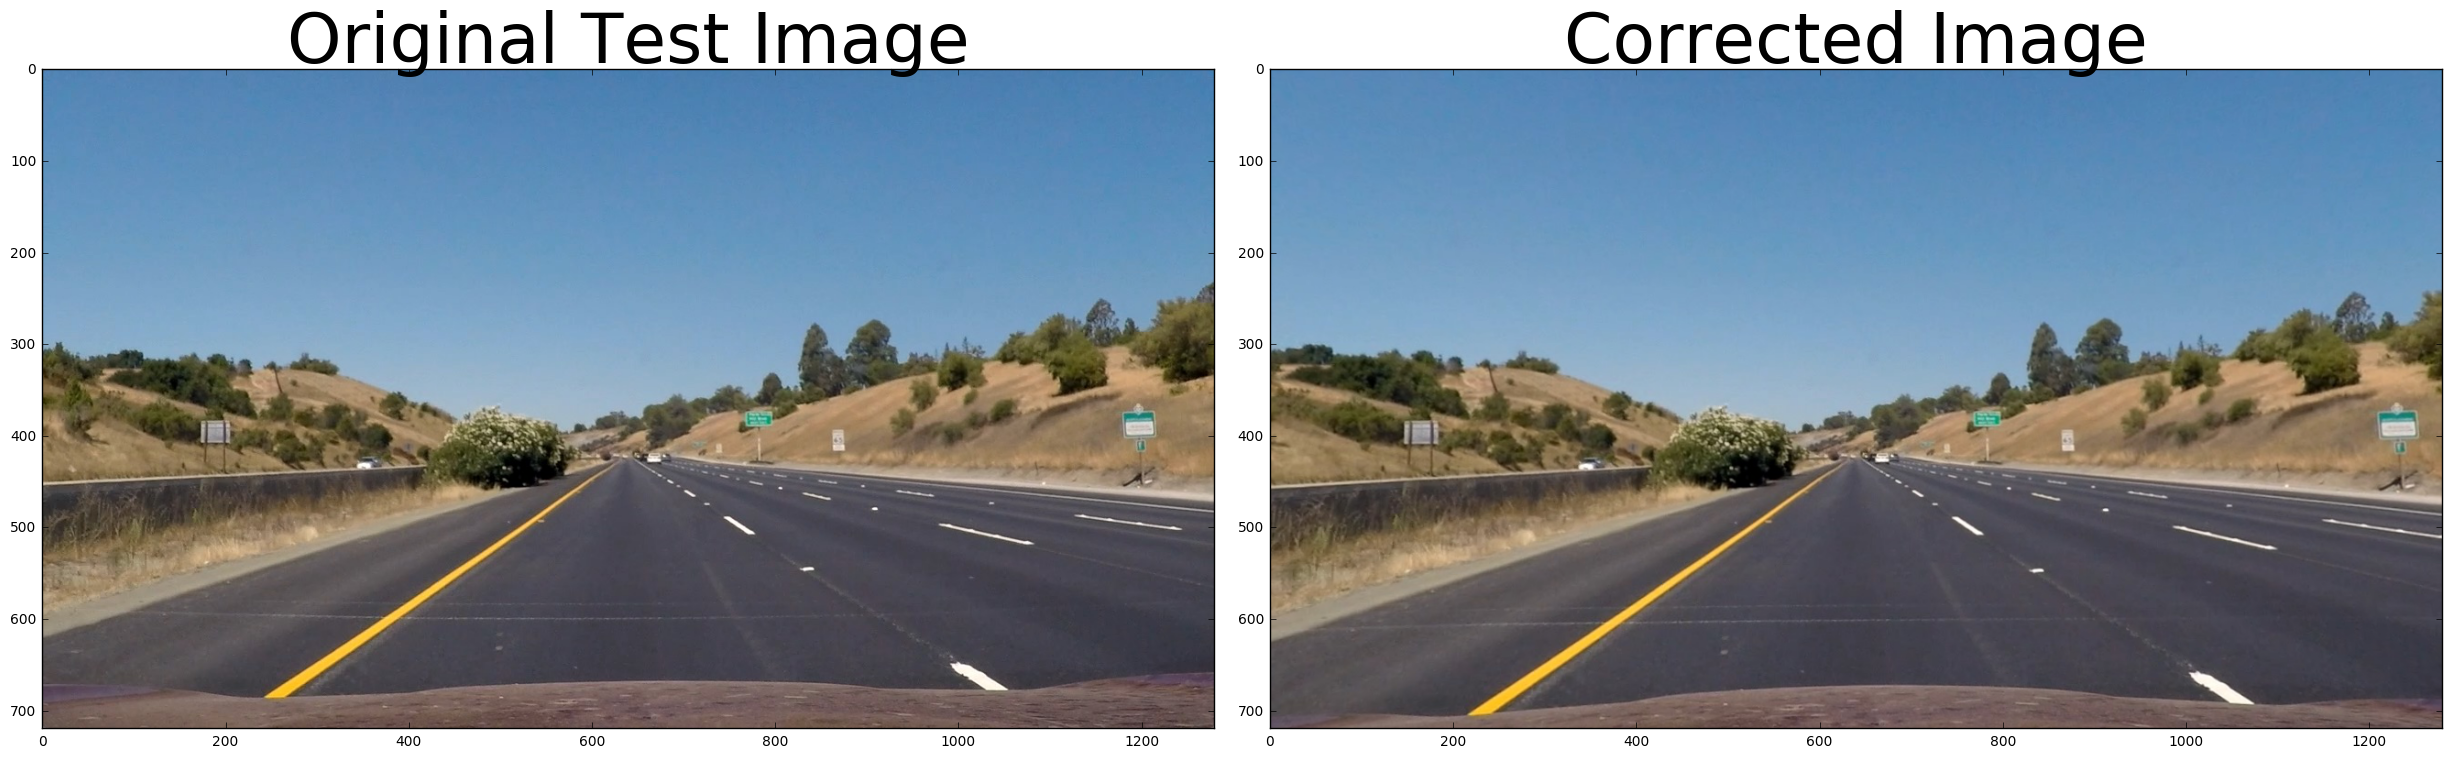

In [4]:
test_images = glob.glob('test_images/*.jpg')
test_image = mpimg.imread(test_images[0])
corrected = camera.undistort(test_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Test Image', fontsize=50)
ax2.imshow(corrected)
ax2.set_title('Corrected Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
